In [12]:
from papyri.ts import parse, parser

In [7]:
import numpy as np

In [14]:
tree = parser.parse(np.__doc__.encode())

In [98]:
from collections import defaultdict


class Visitor:
    def __init__(self):
        self.map = {}

    def visit(self, node):
        if node.type not in self.map:
            self.map[node.type] = set()
        for c in node.children:
            self.map[node.type].add(c.type)
            self.visit(c)
        return self


v = Visitor().visit(tree.root_node)

In [100]:
def number(graph):
    items = dict()
    _g = {k: [*v] for k, v in graph.items()}
    _g["interpreted_text"].remove("interpreted_text")
    _g["list_item"].remove("definition")
    for i in range(len(_g)):
        leaves = {k for k, v in _g.items() if not v}
        for l in leaves:
            del _g[l]
        for k in leaves:
            items[k] = i
            for x, y in _g.items():
                if k in y:
                    y.remove(k)

    return items


number(v.map)

{'adornment': 0,
 '::': 0,
 'bullet': 0,
 'interpreted_text': 0,
 'reference': 0,
 'text': 0,
 'literal': 0,
 'title': 1,
 'term': 1,
 'literal_block': 1,
 'section': 2,
 'paragraph': 2,
 'body': 3,
 'list_item': 4,
 'enumerated_list': 5,
 'definition_list': 5,
 'definition': 6,
 'document': 6}

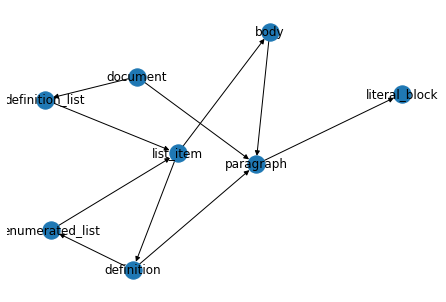

In [68]:
import networkx as nx

G = nx.DiGraph()
skip = {
    "adornment",
    "::",
    "reference",
    "bullet",
    "literal",
    "interpreted_text",
    "text",
    "term",
    "title",
    "section",
}
G.add_nodes_from(set(v.map.keys()) - skip)
for parent, children in v.map.items():
    for child in children:
        if child in skip:
            continue
        G.add_edge(parent, child)
pos = nx.spring_layout(
    G,
    iterations=2000,
)
nx.draw(G, pos, with_labels=True)

In [46]:
!conda install graphviz

Solving environment: ...working... ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt

